In [5]:

# Data augmentation
augmentation = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [6]:
# removing the top layer of the base model
base_Model = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

# creating the head of the model
head_Model = base_Model.output
head_Model = AveragePooling2D(pool_size=(2, 2))(head_Model)
head_Model = Flatten(name="flatten")(head_Model)
head_Model = Dense(128, activation="relu")(head_Model)
head_Model = Dropout(0.5)(head_Model)
head_Model = Dense(2, activation="softmax")(head_Model)

In [7]:
# placing the head  model on top of the base model 
InceptionV3model = Model(inputs=base_Model.input, outputs=head_Model)

#looping over all layers to freeze the model
for layers in base_Model.layers:
    layers.trainable = False

# compiling the model
print("[INFO] compiling the model...")
optimize = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
InceptionV3model.compile(loss="binary_crossentropy", optimizer=optimize,
      metrics=["accuracy"])

[INFO] compiling the model...


D:\anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
 # trainning the model
EPOCHS = 5
print("[INFO] training the model...")
L = InceptionV3model.fit(
    augmentation.flow(trainX,trainY,batch_size=BS),
    steps_per_epoch=len(trainX)//BS,
    validation_data=(testX,testY),
    validation_steps=len(testX)//BS,
    epochs=EPOCHS)

[INFO] training the model...
Epoch 1/5
129/129 [==============================] - 468s 4s/step - loss: 0.0365 - accuracy: 0.9897 - val_loss: 0.0096 - val_accuracy: 0.9975
Epoch 2/5
129/129 [==============================] - 533s 4s/step - loss: 0.0315 - accuracy: 0.9907 - val_loss: 0.0090 - val_accuracy: 0.9983
Epoch 3/5
129/129 [==============================] - 482s 4s/step - loss: 0.0265 - accuracy: 0.9924 - val_loss: 0.0079 - val_accuracy: 0.9979
Epoch 4/5
129/129 [==============================] - 464s 4s/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0071 - val_accuracy: 0.9983
Epoch 5/5
129/129 [==============================] - 493s 4s/step - loss: 0.0219 - accuracy: 0.9920 - val_loss: 0.0077 - val_accuracy: 0.9983


In [9]:
print("[INFO] evaluating the model...")
predIdxs =InceptionV3model.predict(testX, batch_size=BS)

# for each and every image in the testing set, we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# printing the classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
     target_names=lb.classes_))

# saving the model
print("[INFO] saving mask detection model...")
InceptionV3model.save("mask_detection.model", save_format="h5")

[INFO] evaluating the model...
              precision    recall  f1-score   support

    withmask       1.00      0.99      0.99      1177
 withoutmask       0.99      1.00      0.99      1182

    accuracy                           0.99      2359
   macro avg       0.99      0.99      0.99      2359
weighted avg       0.99      0.99      0.99      2359

[INFO] saving mask detection model...


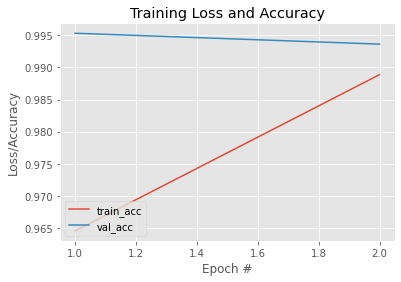

In [10]:
K= EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, K+1), L.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, K+1), L.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

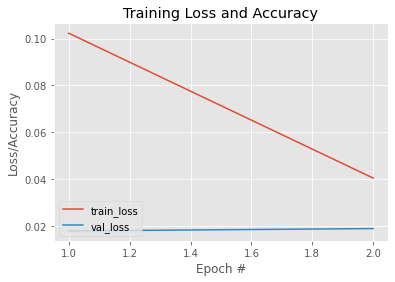

In [11]:
K= EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, K+1), L.history["loss"], label="train_loss")
plt.plot(np.arange(1, K+1), L.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

This image contains mask!!!


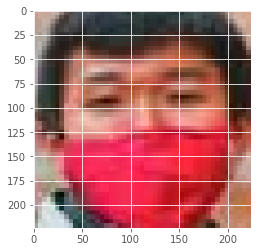

In [12]:
#print(predIdxs)
img12 =load_img(r'D:\users\meyyappan\downloads\Face Mask Dataset\withmask\5.png',target_size=(224,224))
plt.imshow(img12)
img12 = img_to_array(img12)
img12 = img12/255.0
img12 = np.expand_dims(img12,axis=0)
model1 = load_model('C:\\Users\\S Meyyappan\\mask_detection.model')
f=model1.predict(img12)
pred1 = np.argmax(f,axis=1)
if pred1[0] == 0:
    print("This image contains mask!!!")
else:
    print("This image doesn't contain mask!!!")